In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [2]:
df = pd.read_csv("11.3 heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

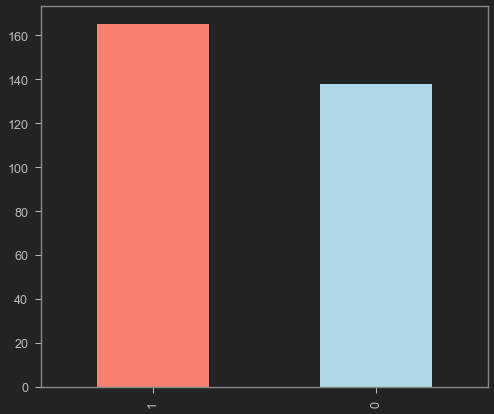

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


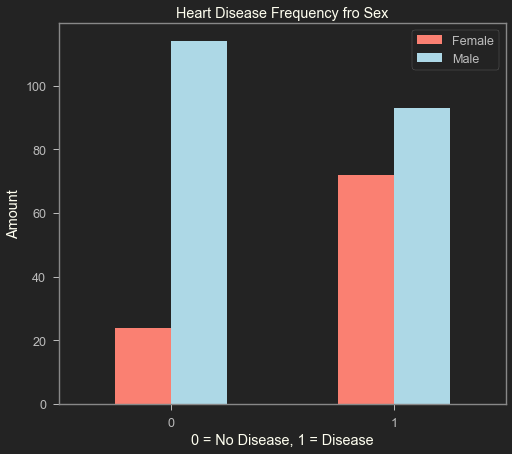

In [11]:
pd.crosstab(df["target"], df["sex"]).plot.bar(color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency fro Sex", color="ivory")
plt.xlabel("0 = No Disease, 1 = Disease", color="ivory")
plt.ylabel("Amount", color="ivory")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

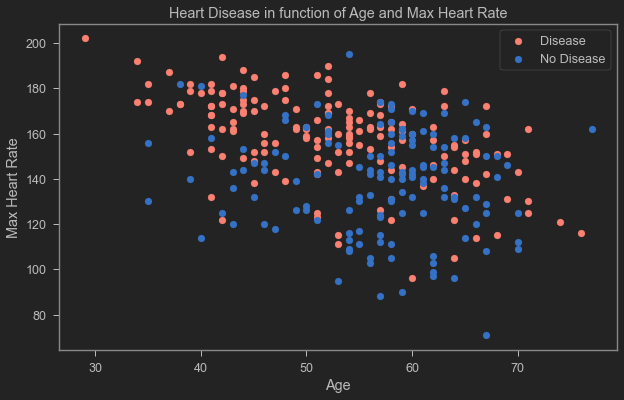

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c="salmon")

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

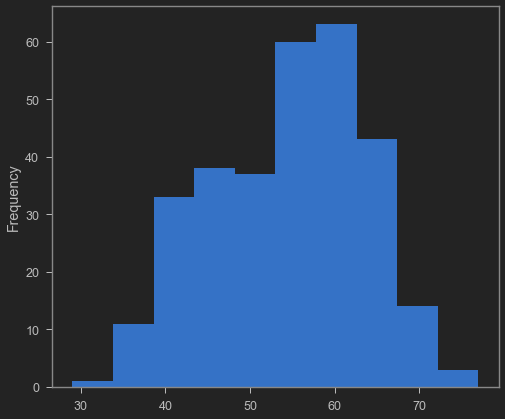

In [13]:
df.age.plot.hist()

In [14]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

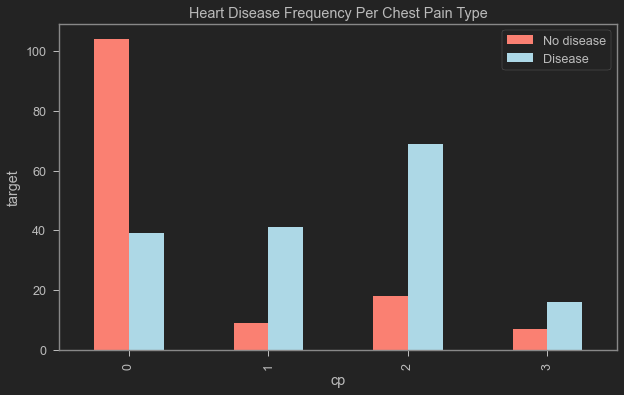

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("cp")
plt.ylabel("target")
plt.legend(["No disease", "Disease"])
plt.xticks()

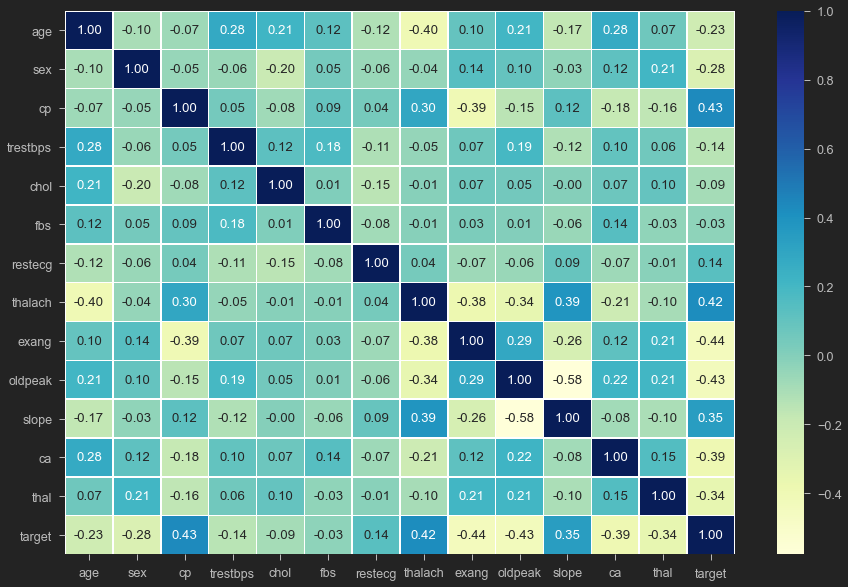

In [16]:
import seaborn as sns

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")


In [17]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_score = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [19]:
model_score = fit_and_score(models = models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


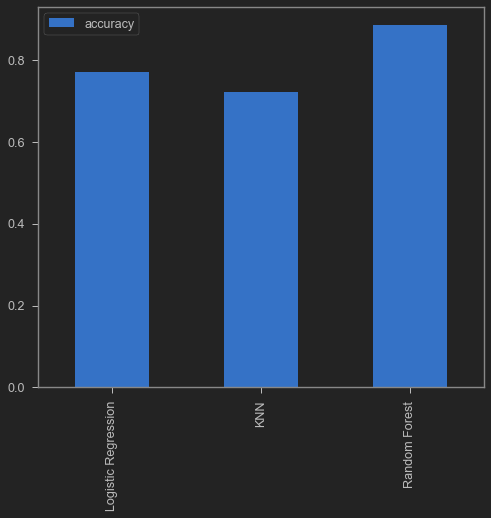

In [20]:
 model_compare = pd.DataFrame(model_score, index=["accuracy"])

model_compare.T.plot.bar()

In [21]:
train_score = []
test_score = []

knn = KNeighborsClassifier()

for i in range(1,21):
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    
    test_score.append(knn.score(X_test, y_test))

Max KNN score on test data: 72.13


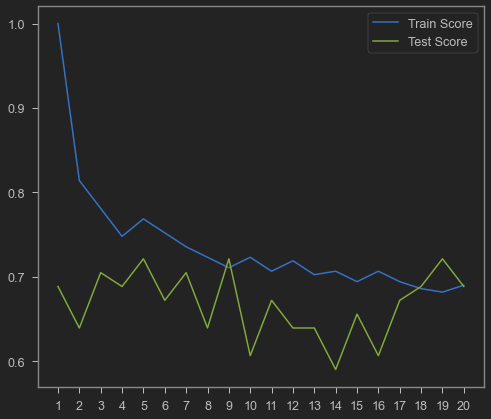

In [22]:
plt.plot(range(1,21), train_score, label="Train Score")
plt.plot(range(1,21), test_score, label="Test Score")
plt.legend()
plt.xticks(np.arange(1,21))
print(f"Max KNN score on test data: {max(test_score) * 100:.2f}")

In [23]:
log_reg_grid = {"C": np.logspace(-4,4, 20),
               "solver": ["liblinear", "sag", "saga"]}

rf = {"n_estimators": np.arange(10, 100, 50),
     "max_depth": [None, 3],
     "min_samples_split": np.arange(2, 20 , 10),
     "min_samples_leaf": np.arange(1, 20, 10)}

In [24]:
rg_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rg_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("Th

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done 100 out of 100 | 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=True)

In [25]:
rg_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [26]:
rg_log_reg.score(X_test, y_test)

0.7704918032786885

In [27]:

np.random.seed(42)

rg_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rg_rf.fit(X_train, y_train)

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3],
                                        'min_samples_leaf': array([ 1, 11]),
                                        'min_samples_split': array([ 2, 12]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [28]:
rg_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_depth': None}

In [29]:
rg_rf.score(X_test, y_test)

0.8852459016393442

In [30]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("Th

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\e

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\e

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\e

C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\EFE\Desktop\heart-disease-project\e

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'sag', 'saga']},
             verbose=True)

In [31]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test, y_test)

0.7704918032786885

In [33]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf,
                    cv=5,
                    verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([ 1, 11]),
                         'min_samples_split': array([ 2, 12]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [34]:
gs_rf.score(X_test, y_test)

0.8852459016393442

In [35]:
y_preds = gs_log_reg.predict(X_test)

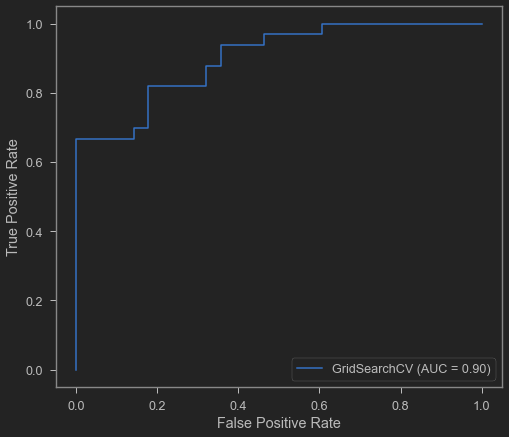

In [36]:
plot_roc_curve(gs_log_reg, X_test, y_test)

In [37]:
gs_log_reg.score(X_test, y_test)

0.7704918032786885

In [38]:
conf_matrix = confusion_matrix(y_test, gs_log_preds)

NameError: name 'gs_log_preds' is not defined

In [ ]:
def sns_plot(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_matrix,
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
sns_plot(y_test, y_preds)    

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
gs_log_reg.best_params_

In [ ]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

In [ ]:
cv_ac = cross_val_score(clf, X, y, scoring="accuracy")
cv_ac

In [ ]:
cv_per = cross_val_score(clf, X, y, scoring="precision")
cv_per

In [ ]:
cv_recall = cross_val_score(clf, X, y, scoring="recall")
cv_recall

In [ ]:
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
cv_f1

In [ ]:
cv_metrix = pd.DataFrame({
    "accuracy": cv_ac,
    "precision": cv_per,
    "recall": cv_recall,
    "f1": cv_f1})
cv_metrix.T.plot.bar(title="Cross-validated classification metrics")


In [ ]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')
clf.fit(X_train, y_train);

In [ ]:
clf.coef_

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feaute importance", legend=False);

In [ ]:
pd.crosstab(df.sex, df.target)

In [ ]:
df["sex"].value_counts()

In [ ]:
pd.crosstab(df.cp, df.target)

In [ ]:
pd.crosstab(df.thal, df.target)

In [ ]:
pd.crosstab(df.ca, df.target)

In [ ]:
from joblib import load, dump

dump(clf, "finished.pkl")

In [ ]:
input_model = load("finished.pkl")